# Example: Singular Value Decomposition of a Gray Scale Image
In this example, students will be familiarized with the singular value decomposition of an image.

### Background
[Singular value decomposition (SVD)](https://en.wikipedia.org/wiki/Singular_value_decomposition) is a powerful tool used in many applications, such as image and data compression, signal processing, and machine learning, that factors a matrix into a canonical form composed of an orthogonal matrix, a diagonal matrix, and another orthogonal matrix.

Let the matrix $\mathbf{A}\in\mathbb{R}^{m\times{n}}$. The singular value decomposition of the matrix $\mathbf{A}$ is given by:
$$
\mathbf{A} = \mathbf{U}\mathbf{\Sigma}\mathbf{V}^{T}
$$
where $\mathbf{U}\in\mathbb{R}^{n\times{n}}$ and $\mathbf{V}\in\mathbb{R}^{m\times{m}}$ are orthogonal matrices and $\mathbf{\Sigma}\in\mathbb{R}^{n\times{m}}$ is a diagonal matrix containing the singular values $\sigma_{i}=\Sigma_{ii}$ along the main diagonal. 

The columns of $\mathbf{U}$ are called left-singular vectors, while the columns of $\mathbf{V}$ are called right-singular vectors. Singular vectors have a unique property: unlike eigenvectors, left- and right-singular vectors are linearly independent and orthogonal.

## Setup
This example requires several external libraries and a function to compute the outer product. Let's download and install these packages and call our `Include.jl` file.

In [1]:
include("Include.jl");

  Activating project at `~/Desktop/julia_work/CHEME-4800-5800-Examples-AY-2024/week-8/L8c`
  No Changes to `~/Desktop/julia_work/CHEME-4800-5800-Examples-AY-2024/week-8/L8c/Project.toml`
  No Changes to `~/Desktop/julia_work/CHEME-4800-5800-Examples-AY-2024/week-8/L8c/Manifest.toml`
    Updating registry at `~/.julia/registries/General.toml`
  No Changes to `~/Desktop/julia_work/CHEME-4800-5800-Examples-AY-2024/week-8/L8c/Project.toml`
  No Changes to `~/Desktop/julia_work/CHEME-4800-5800-Examples-AY-2024/week-8/L8c/Manifest.toml`
        Info We haven't cleaned this depot up for a bit, running Pkg.gc()...
      Active manifest files: 119 found
      Active artifact files: 212 found
      Active scratchspaces: 10 found
     Deleted 31 package installations (26.912 MiB)


## Load an image from `TestImages.jl`
The [TestImages.jl package](https://github.com/JuliaImages/TestImages.jl) provides a convenient Julia interface for loading [standard named test images](https://en.wikipedia.org/wiki/Standard_test_image) and various other example images. Let's load a `Grapyscale` image and use `SVD` to decompose it into frames.  
* Grayscale images are arrays that hold floating point values $0.0\leq{a_{ij}}\leq{1.0}$; a value of `0.0` represents black, and `1.0` means white. Thus, we can use [Singular value decomposition (SVD)](https://en.wikipedia.org/wiki/Singular_value_decomposition) to decompose (or factor) an image into components and look at the information contained within each element.
* Load the `lake_gray` image from the [TestImages.jl package](https://github.com/JuliaImages/TestImages.jl) and save it in the `img` variable.

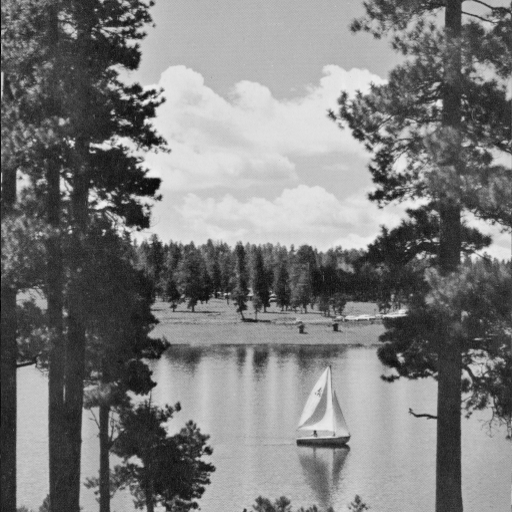

In [2]:
img = testimage("lake_gray") 

Next, let's convert the image into the `grayscale` values using the [convert function](https://docs.julialang.org/en/v1/base/base/#Base.convert) in the Julia standard library.
* We use the `convert.` syntax to apply the conversion to every image element (similar to the `Gray.` to convert to grayscale). This is called a [vectorized dot operation](https://docs.julialang.org/en/v1/manual/mathematical-operations/#man-dot-operators). We save the grayscale image matrix in the `image_array` variable.

In [3]:
image_array = convert.(Float64, Gray.(img)) # convert the image to an array of floats

512×512 Matrix{Float64}:
 0.145098   0.501961  0.509804  0.458824  …  0.72549   0.709804  0.588235
 0.141176   0.478431  0.513725  0.494118     0.737255  0.713725  0.490196
 0.145098   0.396078  0.411765  0.486275     0.698039  0.65098   0.356863
 0.145098   0.439216  0.396078  0.501961     0.682353  0.517647  0.333333
 0.133333   0.392157  0.396078  0.458824     0.654902  0.47451   0.270588
 0.133333   0.427451  0.423529  0.462745  …  0.686275  0.513725  0.282353
 0.133333   0.454902  0.521569  0.568627     0.623529  0.537255  0.309804
 0.129412   0.537255  0.6       0.666667     0.45098   0.45098   0.27451
 0.0862745  0.619608  0.686275  0.670588     0.392157  0.462745  0.384314
 0.0784314  0.494118  0.607843  0.623529     0.352941  0.501961  0.380392
 0.0705882  0.415686  0.564706  0.65098   …  0.25098   0.309804  0.34902
 0.0627451  0.372549  0.505882  0.6          0.192157  0.215686  0.470588
 0.0823529  0.352941  0.32549   0.431373     0.203922  0.231373  0.509804
 ⋮             

Now, we can use the [SVD command exported from the LinearAlgebra package](https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/#LinearAlgebra.SVD) to compute the singular value decomposition of `image_array.`
* This produces the `U,` `Σ`, and `V` matrices, holding the left singular vectors, the singular values, and the right singular vectors, respectively

In [4]:
(U,Σ,VT) = svd(image_array); # compute the SVD of the image

In [19]:
U[:,3]

512-element Vector{Float64}:
 -0.07364967542475798
 -0.07525482730263797
 -0.07080299171545804
 -0.06537281477302292
 -0.061453094188334334
 -0.06104699938093444
 -0.05993841379642992
 -0.04003238474513031
 -0.031216875729891232
 -0.036334979401335545
 -0.02572050286311008
 -0.01750032981005019
 -0.013074016717777262
  ⋮
 -0.026171393057326547
 -0.02055453586335997
 -0.018783081914350037
 -0.024131632600773355
 -0.026608081795740625
 -0.02881408397469517
 -0.03178188414402366
 -0.037184001748921204
 -0.041251337112656994
 -0.049272091754209504
 -0.05235732648141896
 -0.05373629808893522

### Compute the sub-images and store them in a dictionary
Singular value decomposition (SVD) can be thought of as decomposing a matrix into a weighted, ordered sum of separable matrices, e.g., frames of a larger image. Let $\mathbf{A}\in\mathbb{R}^{m\times{n}}$ have the singular value decomposition $\mathbf{A} = \mathbf{U}\mathbf{\Sigma}\mathbf{V}^{T}$. Then, the matrix $\mathbf{A}\in\mathbb{R}^{m\times{n}}$ can be written as:

$$
\mathbf{A} = \sum_{i=1}^{r_{\mathbf{A}}}\sigma_{i}\cdot\left(\mathbf{u}_{i}\otimes\mathbf{v}_{i}\right)
$$

where $r_{\mathbf{A}}$ is the rank of matrix $\mathbf{A}$, the vectors $\mathbf{u}_{i}$ and $\mathbf{v}_{i}$ are the ith left and right singular vectors, and $\sigma_{i}$ are the ordered singular values. The [outer-product](https://en.wikipedia.org/wiki/Outer_product) $\left(\mathbf{u}_{i}\otimes\mathbf{v}_{i}\right)$ is the separable component of the matrix $\mathbf{A}$. 

* We compute the `rank` of `image_array` using the [rank function](https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/#LinearAlgebra.rank) and then calculate the individual frames of the image by computing the [outer product](https://en.wikipedia.org/wiki/Outer_product) of the left and right singular vectors.
* We use the [foreach iteration pattern](https://docs.julialang.org/en/v1/base/collections/#Base.foreach) as a short cut means of populating the `image_dictionary` variable. We could have used a regular `for loop.` But let's go crazy!

In [5]:
R = rank(image_array); # how many frames will we have?
image_dictionary = Dict{Int64,Matrix{Gray{Float64}}}();
foreach(i -> image_dictionary[i] = Σ[i]*⊗(U[:,i],VT[:,i]), 1:R); # another iteration pattern???

In [21]:
R = rank(image_array)

512

### Not every sub-image contains the same amount of information
One of the cool things about [singular value decomposition](https://en.wikipedia.org/wiki/Singular_value_decomposition) is the `modes` are sorted and weighted by the singular values. Thus, we can compute the contribution of each `mode` by looking at the singular values.
* Let's compute and visualize how much information, i.e., what fraction of the original image is explained by each `mode`, by looking at cumulative 

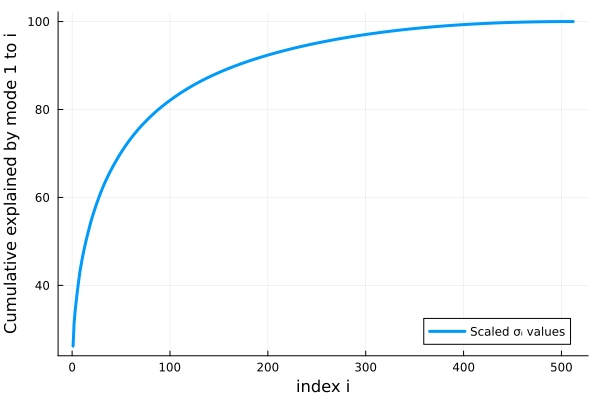

In [6]:
# make a plot of the fractional contribution of the singular values
number_of_modes = length(Σ);
ΣS = (1/sum(Σ))*Σ;
explained_array = [100*sum(ΣS[1:i]) for i ∈ 1:number_of_modes]; # comprehension

plot(explained_array, label="Scaled σᵢ values", lw=3)
xlabel!("index i", fontsize=18)
ylabel!("Cumulative explained by mode 1 to i", fontsize=18)

### Can you reconstruct the original image by adding up all the sub-images?
Let's try to rebuild the original image by `adding up` the sub-images. Since the original image is just a matrix, we can use the structural decomposition idea to do this. 
* Grab the first `frame` from the `image_dictionary` and set this to the `M` variable. Then, iterate through the collection up to a specified `number_of_frames` of frames, where we update the `M` variable each time through the loop.

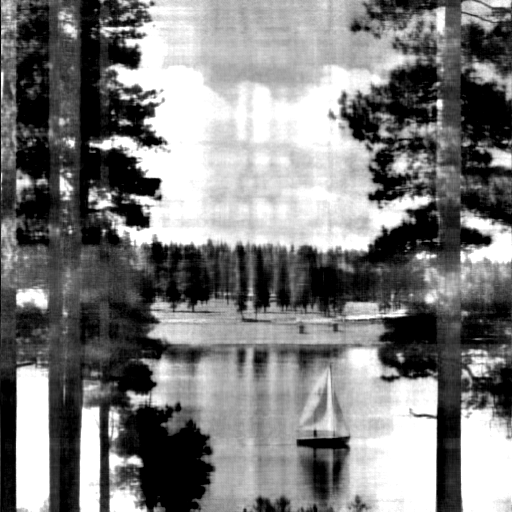

In [14]:
# M = image_dictionary[1];
number_of_frames = 100;
for i ∈ 2:number_of_frames
    M += image_dictionary[i]
end

M

### What is the rank of the matrix blocks being added together?
Recall that the rank of a matrix is the number of linearly independent rows (or columns), i.e., it is a measure of the unique information held by the matrix. What is the rank of the $\left(\mathbf{u}_{i}\otimes\mathbf{v}_{i}\right)$ values that we are adding together?
* We've implemented the [outer product](https://en.wikipedia.org/wiki/Outer_product) calculation in the `⊗` function in [src/Compute.jl](src/Compute.jl). Check it out!

In [16]:
i = 100;
RM = ⊗(U[:,i],VT[:,i]) # what the what?

512×512 Matrix{Float64}:
  4.49769e-6    8.95534e-5    6.80112e-5   …  -4.64538e-5    1.78843e-7
 -5.75225e-5   -0.00114533   -0.000869818      0.000594112  -2.28728e-6
  0.000276778   0.00551092    0.00418526      -0.00285866    1.10056e-5
 -0.000148041  -0.00294763   -0.00223858       0.00152902   -5.88658e-6
  8.73951e-5    0.00174012    0.00132153      -0.000902647   3.47511e-6
 -0.000117773  -0.00234498   -0.00178089   …   0.00121641   -4.68306e-6
 -1.9564e-5    -0.000389538  -0.000295834      0.000202064  -7.77928e-7
  0.000327493   0.00652071    0.00495214      -0.00338246    1.30222e-5
 -0.000297952  -0.00593251   -0.00450544       0.00307735   -1.18475e-5
 -2.39143e-5   -0.000476157  -0.000361617      0.000246996  -9.50911e-7
  0.00033797    0.00672931    0.00511056   …  -0.00349067    1.34388e-5
 -7.30466e-5   -0.00145443   -0.00110456       0.000754451  -2.90457e-6
  0.000141215   0.00281173    0.00213537      -0.00145852    5.61518e-6
  ⋮                                    

In [20]:
rank(RM)

1

## Extra stuff below here. Keep moving, nothing to see.

#### Write frames all the frames to disk

In [9]:
# dump each frame to disk -
should_we_execute_this_block = false
if (should_we_execute_this_block == true)
    
    M = image_dictionary[1];
    R = rank(image_array);
    
    # dump frame 1 -
    plot(M, axis=nothing, border=:none)
    savefig(joinpath(_PATH_TO_FRAMES, "frame-1.pdf"))
    
    number_of_frames = R;
    for i ∈ 2:number_of_frames
        M = M + image_dictionary[i]
        
         # dump frame 1->1 -
        plot(M, axis=nothing, border=:none)
        fname = "frame-$(i).pdf"
        savefig(joinpath(_PATH_TO_FRAMES, fname))
    end
end